In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,r2_score

In [2]:
data = pd.read_csv('./uber.csv')
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
data = data.dropna()
data = data.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
low = data['fare_amount'].quantile(0.25)
high = data['fare_amount'].quantile(0.75)
data = data[(data['fare_amount']>=low)&(data['fare_amount']<=high)]
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
8,9.7,-73.975187,40.745767,-74.002720,40.743537,1
9,12.5,-74.001065,40.741787,-73.963040,40.775012,1
10,6.5,-73.974388,40.746952,-73.988586,40.729805,1
...,...,...,...,...,...,...
199990,12.0,-73.987106,40.741894,-73.952240,40.772957,1
199992,8.9,-74.003548,40.714045,-73.991053,40.684500,1
199993,9.5,-73.987798,40.721210,-73.980960,40.744388,1
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1


<Axes: >

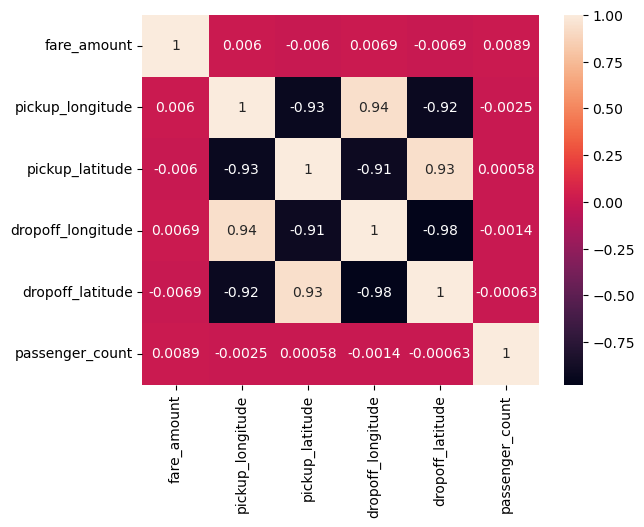

In [7]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,annot=True)

In [9]:
X = data.drop('fare_amount',axis=1)
Y = data['fare_amount']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)
lm = LinearRegression()
lm.fit(xtrain,ytrain)
ypred = lm.predict(xtest)
print("RMSE : ",root_mean_squared_error(ytest,ypred))
print("R2 : ",r2_score(ytest,ypred))

RMSE :  1.867185646603817
R2 :  0.0002948026584760344


In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)
rm = RandomForestRegressor(n_estimators=5)
rm.fit(xtrain,ytrain)
ypred = rm.predict(xtest)
print("RMSE : ",root_mean_squared_error(ytest,ypred))
print("R2 : ",r2_score(ytest,ypred))

RMSE :  1.5225715253716963
R2 :  0.3352591676803185
